In [1]:
!pip install mo-gymnasium
!pip install git+https://github.com/LucasAlegre/morl-baselines.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.6/479.6 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 35.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
  Cloning https://github.com/LucasAlegre/morl-baselines.git to /tmp/pip-req-build-smzv99ad
  Running command git clone --filter=blob:none --quiet https://github.com/LucasAlegre/morl-baselines.git /tmp/pip-req-build-smzv99ad
  Resolved https://github.com/LucasAlegre/morl-baselines.git to commit 92572aa5ee13e98b9e080f64df8e29602dba4f69
  Installi

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import gymnasium as gym
import mo_gymnasium as mo_gym
import numpy as np
import sys
sys.path.append('/content/drive/MyDrive')
from mo_awr.MO_AWR import MO_AWR

# Deep Sea Treasure

A standard deterministic MOMDP which we can use to test the algorithm initially.

In [14]:
env = mo_gym.make("deep-sea-treasure-v0")
agent = MO_AWR(env, np.array([1,1,1]), log=False, td_lambda=.9, use_popf=False, max_buffer_size=128, value_lr=1e-3, policy_lr=1e-3, popf_lr=5e-4, batch_size=4, beta=.2, alpha=0.01, use_is_weighting=False)

#agent.train(1000000, 20, num_value_steps=500, num_policy_steps=500, num_popf_steps=500, num_pf_points=10, num_expl_episodes=10, log_every=2, prune_pf_every=5, pf_prune_threshold=np.array([.1,1]))

In [1]:
from morl_baselines.multi_policy.pareto_q_learning.pql import PQL
pql_agent = PQL(env, np.array([1,1]), gamma=1)
pql_agent.train

NameError: name 'env' is not defined

# Random MOMDP

In order to test MO-AWR on a random environment, we can use the code at https://github.com/rradules/POP-following/blob/main/envs/randommomdp.py to generate an MOMDP where we can decide randomness and the problem size ourselves.



In [2]:
env = mo_gym.make("random_momdp-v0", nstates=5, nobjectives=2, nactions=3, nsuccessor=2, seed=12)

from gymnasium.wrappers import FlattenObservation
#env = FlattenObservation(env)

#agent = MO_AWR(env, log=False, td_lambda=.9, use_popf=True, max_buffer_size=100, value_lr=1e-3, policy_lr=5e-4, popf_lr=8e-4, batch_size=32, min_exploration_stdev=4, alpha=0.05, beta=.1, use_is_weighting=False)
#agent.train(1000000, 25, num_value_steps=100, num_policy_steps=100, num_popf_steps=100, num_pf_points=10, num_expl_episodes=10, log_every=3, prune_pf_every=10, num_eval_iter=15, pf_prune_threshold=np.array([1,1]))

/usr/local/lib/python3.11/dist-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/usr/local/lib/python3.11/dist-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


# Water Reservoir (discrete)
A discrete version of a dam MOMDP (https://github.com/Farama-Foundation/MO-Gymnasium/blob/main/mo_gymnasium/envs/water_reservoir/dam_env.py).



In [4]:
env = mo_gym.make("dam_env-v0", s_0=np.int64([5]), seed=0, penalize=False)
#agent = MO_AWR(env, np.array([0.1,0.1,0.1]), log=False, td_lambda=.9, use_popf=True, max_buffer_size=1024, value_lr=1e-3, policy_lr=5e-4, popf_lr=5e-4, batch_size=32, beta=.3, alpha=.01, use_is_weighting=False)
#agent.train(1000000, 250, num_value_steps=500, num_policy_steps=500, num_popf_steps=500, num_pf_points=7, num_expl_episodes=25, log_every=3, prune_pf_every=10, num_eval_iter=10, pf_prune_threshold=np.array([5,5]))

/usr/local/lib/python3.11/dist-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/usr/local/lib/python3.11/dist-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [3]:
from morl_baselines.multi_policy.pareto_q_learning.pql import PQL
pql_agent = PQL(env, np.array([0, 0]), gamma=1)
pql_agent.train(500000,env, np.array([0,-30]), num_eval_weights_for_eval=5)

wandb: Currently logged in as: liam-mertens02 (vub-ai) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


KeyboardInterrupt: 

In [18]:
pql_agent.get_local_pcs(0)

{(0.7025694688406048, -1.0),
 (0.7025701427143949, -2.0),
 (8.199999809265137, -3.0),
 (11.5, -5.0),
 (14.0, -7.0),
 (15.100000381469727, -8.0),
 (16.100000381469727, -9.0),
 (16.10019487993821, -11.0),
 (16.100194933995596, -12.0),
 (19.600000381469727, -13.0),
 (20.299999237060547, -14.0),
 (20.30019373552903, -16.0),
 (22.399999618530273, -17.0),
 (23.700000762939453, -19.0),
 (24.18333407810756, -21.0),
 (24.207500743865968, -22.0),
 (24.690834059034074, -23.0),
 (24.72801354481624, -24.0),
 (25.211346859984346, -25.0),
 (25.2766621728449, -26.0),
 (25.759995488013008, -27.0),
 (25.85666215104663, -28.0),
 (26.339995466214738, -29.0),
 (26.471813643078768, -30.0),
 (26.955146958246875, -31.0),
 (27.296593416699398, -32.0),
 (27.62599711888435, -33.0),
 (28.219320654747605, -34.0),
 (28.592663749220566, -35.0),
 (29.185987285083822, -36.0),
 (29.237839134986913, -37.0),
 (29.765987263285552, -38.0),
 (29.936588119974683, -39.0),
 (30.375982042854783, -40.0),
 (30.85931535802289, -41

In [8]:
from morl_baselines.common.performance_indicators import hypervolume
print(hypervolume(np.array([-150,-50]), np.array(list(pql_agent.get_local_pcs(0)))))

6416.022941916653


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def eval_pcn(n, n_points):
  evals = np.zeros((n_points,2))
  for i in range(n):
    e, p, _ = pcn_agent.evaluate(env, np.array([100,100]), n_points)
    evals += np.array(e)
  evals /= n
  return evals, p
def plot_eval(evals, pf, filename):
  x2, y2 = zip(*pf)
  x3, y3 = zip(*evals)
  plt.figure(figsize=(8, 6))
  plt.scatter(x2, y2, color='red', label='Pareto front')
  plt.scatter(x3, y3, color='green', label='evaluated pf')

  # Add labels and legend
  plt.xlabel('Obj 1')
  plt.ylabel('Obj 2')
  plt.legend()
  plt.title('Comparison of PF and evaluations')
  plt.savefig(filename)
  plt.show()
def make_csv(evals, pf, filename):
  comb = np.hstack((pf, evals))
  np.savetxt(filename, comb, delimiter=",", fmt='%.2f')

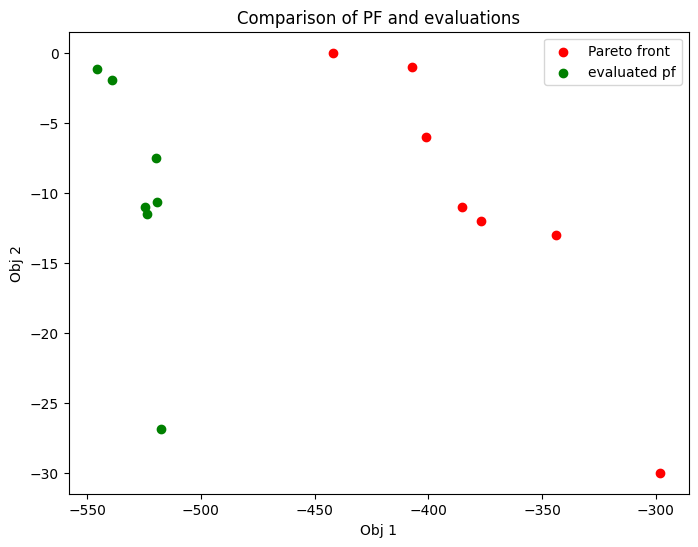

In [ ]:
evals, pf = eval_pcn(20, 7)
plot_eval(evals, pf, "pcn_eval.png")
make_csv(evals, pf, "pcn_eval.csv")

In [ ]:
!zip -r /content/drive/MyDrive/mo_awr/results.zip /content/drive/MyDrive/mo_awr/Results/

  adding: content/drive/MyDrive/mo_awr/Results/ (stored 0%)
  adding: content/drive/MyDrive/mo_awr/Results/plots/ (stored 0%)
  adding: content/drive/MyDrive/mo_awr/Results/plots/training_plot_1.png (deflated 7%)
  adding: content/drive/MyDrive/mo_awr/Results/plots/training_plot_2.png (deflated 7%)
  adding: content/drive/MyDrive/mo_awr/Results/plots/training_plot_3.png (deflated 7%)
  adding: content/drive/MyDrive/mo_awr/Results/plots/training_plot_4.png (deflated 7%)
  adding: content/drive/MyDrive/mo_awr/Results/plots/training_plot_5.png (deflated 7%)
  adding: content/drive/MyDrive/mo_awr/Results/plots/training_plot_6.png (deflated 5%)
  adding: content/drive/MyDrive/mo_awr/Results/plots/training_plot_7.png (deflated 6%)
  adding: content/drive/MyDrive/mo_awr/Results/plots/training_plot_8.png (deflated 6%)
  adding: content/drive/MyDrive/mo_awr/Results/plots/training_plot_9.png (deflated 7%)
  adding: content/drive/MyDrive/mo_awr/Results/plots/training_plot_10.png (deflated 7%)
  a

In [6]:
!rm -rf /content/drive/MyDrive/mo_awr/Results/

In [ ]:
agent.evaluate_pf(64)

[[array([11.311, 14.566]), 25.0],
 [array([10.738, 15.798]), 25.0],
 [array([ 6.747, 17.644]), 25.0],
 [array([12.968, 13.264]), 25.0],
 [array([ 6.275, 17.485]), 25.0]]

In [ ]:
agent.experience_replay

[(-4.925318,
  13348,
  [Transition(observation=array([0, 0], dtype=int32), action=3, reward=array([ 0., -1.], dtype=float32), return_=array([ 0.411, -5.366], dtype=float32), observed_return=array([ 0.7, -6. ], dtype=float32), horizon=6, next_observation=array([0, 1], dtype=int32), prob=0.3229936, terminal=False),
   Transition(observation=array([0, 1], dtype=int32), action=0, reward=array([ 0., -1.], dtype=float32), return_=array([ 0.403, -4.288], dtype=float32), observed_return=array([ 0.7, -5. ], dtype=float32), horizon=5, next_observation=array([0, 1], dtype=int32), prob=0.11773526, terminal=False),
   Transition(observation=array([0, 1], dtype=int32), action=3, reward=array([ 0., -1.], dtype=float32), return_=array([ 0.414, -3.258], dtype=float32), observed_return=array([ 0.7, -4. ], dtype=float32), horizon=4, next_observation=array([0, 2], dtype=int32), prob=0.2767935, terminal=False),
   Transition(observation=array([0, 2], dtype=int32), action=2, reward=array([ 0., -1.], dtype=

# Training Notes
- Most episodes in the ER only reach the first reward:
  - ER buffer is constructed such that new episodes are always added
  - This removes episodes by:
    1. Duplicates
    2. Distance metric (L2 + crowding)
    3. Oldest first
  - better returns are achieved as better PF returns are added to the PF

- buffer size, batch size and num expl episodes are important choices:
  - Num expl episodes needs to add enough episodes for them to be of significance during the next training iteration(s)
  - If num_exl is too large (and buffer size too small) then exploration episodes can overwrite episodes with good returns!
  - The smaller the batch size, the more these episodes have impact on training => faster convergence (depending on environment0
  - Larger buffer size means less chance of these exploration episodes to be used for training in the next timestep. A sufficient size is needed to ensure enough points are in te buffer for computing each point in the pf (at least batch_size*num_pf_points, but pref. more)
  - Preferably small batch size (16/32/64) and large buffer (1024/2048) depending on problem size
  - Depending on buffer size, pick sufficiently large number of exploration episodes to increase convergence speed

Idea:
- In order to improve the PF over time, average returns (from s0) must improve
- We need sufficient 'better' trajectories (at least batch_size) for this average to improve
- Take batches of (s,a) instead of only over state. This implies that taking similar actions in similar states leads to similar polices, which in term helps with convergence
- Using such batches could also solve loss/gradient issues!
- This complies with using this model for stochastic transitions, as we want averages over state action pairs
- This implies that we learn deterministic policies

Questions:
- Policy explorations improved drastically after using tanh inbetween hidden layers
- Value estimates are more accurate when using tanh
- Weighting losses using IS ratio should help because data is very off-policy compared to single-objective RL.
- Try to modify V such that:
  - V is conditioned on (s,a,R,h), with R being observed returns and outputs expected returns. This way, V learns the relation between returns and expected returns.
  - The value loss function should not be weighted this way
  - The TD(λ) return needs to be modified slightly => no keeping track of followed value vector, but rather keep track of the MC return (this way we can feed this return into V to get that part of the return)
- OR: try to decrease TD(λ) such that expectation is learned implicitly over time instead of by batching
- The MC return and the value function have a mismatch (observed vs expected returns), this can become a problem in random environments!
- Add stdev used for exploration as param => encourage exploration when only a single point is in the PF

TODO:
- After policy evaluation it is clear that the agent often does not reach a terminal state => it learns to make cycles and uses these bootstrapped estimates to get its rewards...
  - weight policy loss so off-policy actions contribute less => less-likely to learn wrong actions by off policy learning... upon policy eval, the policies result in the first reward only
  - Experiment with Beta: slightly larger values result in better policy eval => small beta penalizes steepens difference between expected value and desired policy return. Because of the initial mismatch between the TD-return and the expected returns, these losses are inaccurate

- Try to balance actor and critic updates:
  - In AWR, the actor is updated more than the critic. This is because the critic is only used to compute the advantage weights, and not for guiding the policy gradients themselves.
  - AWR remains stable without any target network for the critic for this same reason. In our case, value estimates are used for computing the TD(lambda) return (as in AWR). But this return is then used as conditioning for both the actor and critic.

- PF contains 'intermediate' returns: averages of different solutions which are non-dominated by themselves, but are not a distinct solution when evaluated.
  - This is problem specific...
  - Eg. the 3 returns next to each other are very close together (thus have a low crowding distance). Expected returns between 0.7 and 8.3 are in the PF, but not achievable (unless by stochastic policy). This is because crowding distance is higher than for the others.
  - We can replace the PF points by their evaluated returns (taking Pareto dominance into account).
    - ISSUE: mismatch between learned returns, PF and ER returns: picking a pf return and improving it by a slight amount can become impossible due to the policy possibly never having learned such returns... => try to add more expl episodes
    - Another issue is that we stop learning to condition on expected returns and replace them by learning from observations!
    - IDEA: evaluate policies multiple times, this way we can get expected return (important in stochastic env). Only keep PF returns when their evaluated return is close to itself (by some threshold for each objective)

- Learn a PCS for every state (this way we can handle multiple initial states) (difficult to plot though)

- When we want to compute the n-step return, we need to use the correct value vector to give to the value function:
  - If we use the one saved as value_vec (in the transitions), then we are not guaranteed to use the correct one. The value vector followed during exploration or a random policy does not match the actual value vector of that policy!
  - IDEA: use value function to learn relation between observed return and expected returns
    - use mean_r as targets
    - weight losses as before
    - This implies that each policy is uniquely identifiable by V as a pair of a desired return and a horizon
    - compute TD(λ) return from state s as: λ*MC return + (1-λ)V(s,R,h)
    - for policy and for advantage weight computation use V(s,R,h) instead of R_hat! This should loosen dependency between averaged returns and learned actions
    - The policy needs to be conditioned on expected returns => POPF needs to output correct vectors!
- Check if policies are stationary vs non-stationary => computing mean return as target for V might be wrong if we consider non-stationary policies => pick batch such that horizon is same within batch
    